## K Means Algorithm Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [72]:
# make_blobs is a utility function in sklearn used to Generate Gaussian blobs for clustering.
X,y=make_blobs(n_samples=2000,centers=3,n_features=2,random_state=23)

In [3]:
X.shape

(2000, 2)

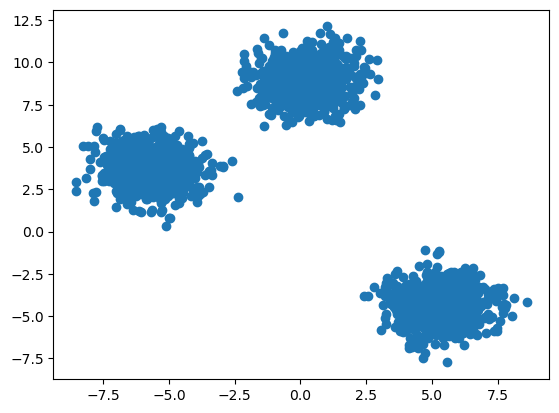

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
## Manual Process
## Elbow Method to select the k value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


In [8]:
wcss

[70086.08048169571,
 16605.5528673447,
 2683.122503258086,
 2383.078908182091,
 2085.813658006942,
 1814.4883437233038,
 1594.6375096080174,
 1410.0087267212946,
 1307.54874787786,
 1118.781955195778]

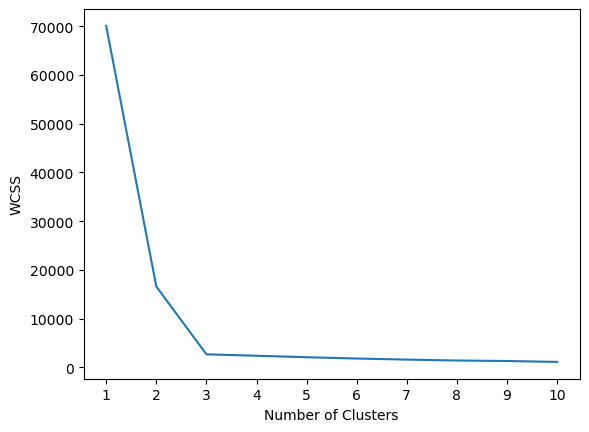

In [9]:
# Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Graph is getting stable after k=3 so it will be my k value for the model

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++")

## clustering the training data

In [11]:
y_labels=kmeans.fit_predict(X_train)

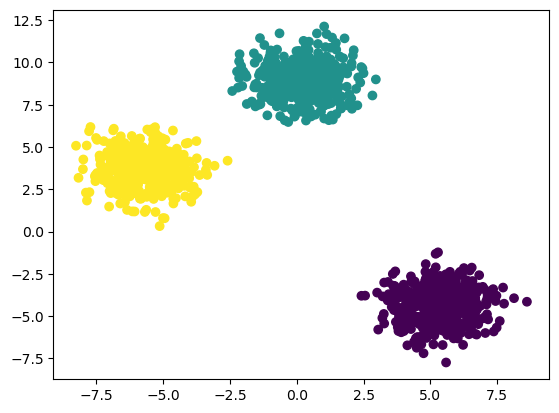

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.show()

## similarly clustering the testing data

In [14]:
y_label1=kmeans.predict(X_test)

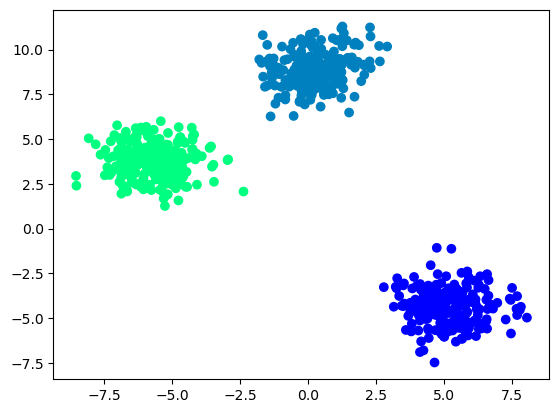

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_label1,cmap="winter")
plt.show()

## Now finding the k value using a sklearn package--Saving the manual task in case of large dataset

In [19]:
!pip install kneed

In [20]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

## Now checking the performance of our kmeans model!!

In [23]:
## Performance metrics
## Silhouette Score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_scores.append(score)

In [27]:
silhouette_scores

[np.float64(0.7231851043856977),
 np.float64(0.8073930743540668),
 np.float64(0.6535014572078593),
 np.float64(0.4540118345291646),
 np.float64(0.46140441282289213),
 np.float64(0.3154525981859794),
 np.float64(0.3256264379379002),
 np.float64(0.3255212956863524),
 np.float64(0.34060237139531)]

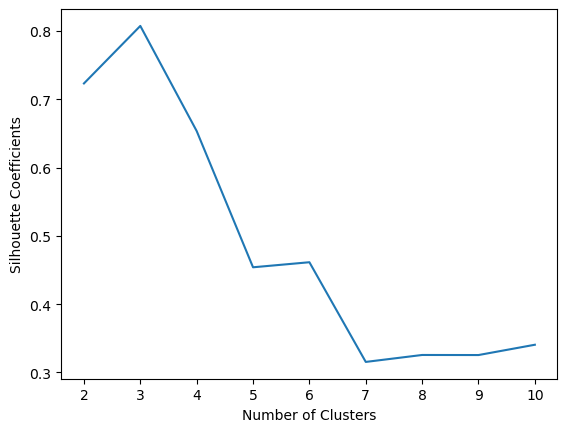

In [28]:
## Plotting the silhouette score
plt.plot(range(2,11),silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

## With k=3 i see a silhouette score of 0.8 is very good.The range of sihouette is -1 to 1

## Note: matplotlib.pyplot.scatter() can only make 2d plots!

## Let's make a 3d plot!!

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

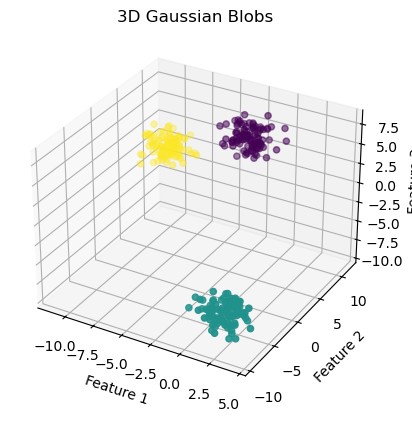

In [73]:
# Create 3D blobs
X, y = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 3 features
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=y, cmap='viridis')

# Label axes
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.title("3D Gaussian Blobs")
plt.show()


## Hierarchical Clustering Implementation

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [30]:
## Import IRIS dataset
iris=datasets.load_iris()

In [31]:
iris_data=pd.DataFrame(iris.data)

In [32]:
iris_data.columns=iris.feature_names

In [33]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## feature scaling ---> Convert 4 dimiensions to 2 dimensions using PCA ---> Make the clusters uisng Hierarchical Clustering

In [34]:
## Standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
X_scaled=scaler.fit_transform(iris_data)

In [36]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [40]:
## Apply the PCA
from sklearn.decomposition import PCA 

In [41]:
pca=PCA(n_components=2)

In [42]:
pca_scaled=pca.fit_transform(X_scaled)

In [43]:
pca_scaled.shape

(150, 2)

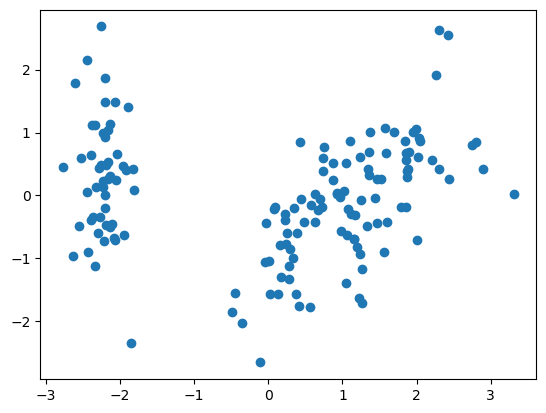

In [45]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])
plt.show()    ## This is the raw scaled data

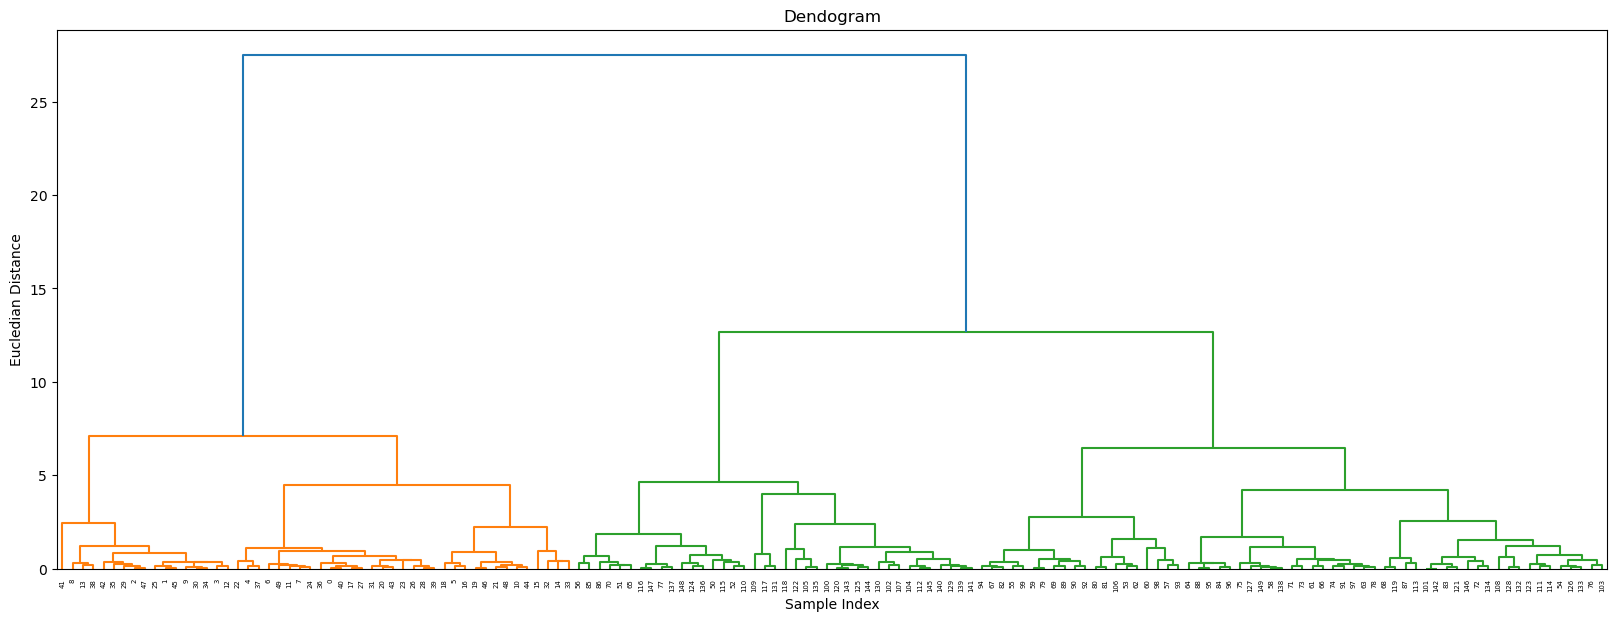

In [48]:
## Agglomerative Clustering
## To construct dendograms
import scipy.cluster.hierarchy as sc
## plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendogram")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
plt.show()

## We can see by the above dendogram that the number of clusters to be made is 2 but lets confirm it programmatically!!

In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage="ward")
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [51]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

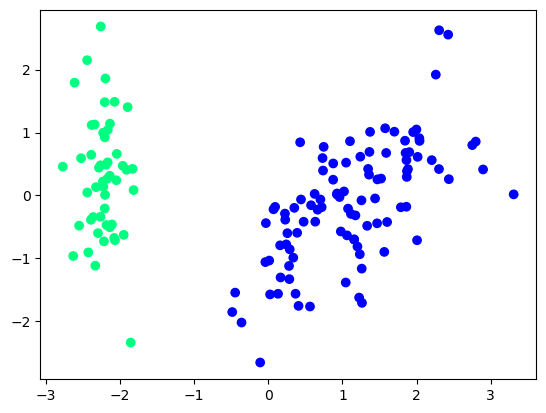

In [53]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_,cmap="winter")
plt.show()

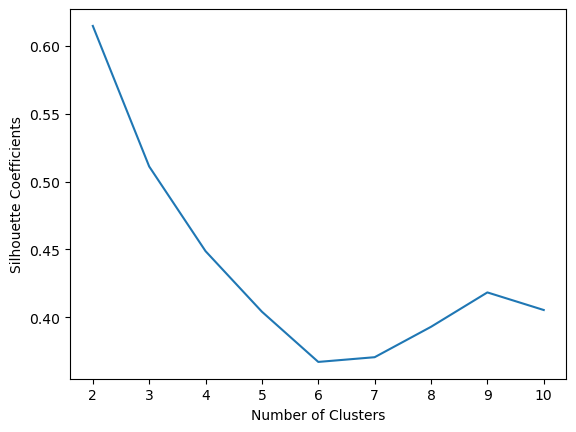

In [59]:
## Performance metric-sihouette score
from sklearn.metrics import silhouette_score

silhouette_scores=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,metric="euclidean",linkage="ward")
    agglo.fit(pca_scaled)
    score=silhouette_score(pca_scaled,agglo.labels_)
    silhouette_scores.append(score)

## Plotting the silhouette score
plt.plot(range(2,11),silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

## DBSCAN Clustering-- best for non linear data

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [61]:
X,y=make_moons(n_samples=250,noise=0.05)

In [62]:
X

array([[-0.11905885,  1.02904097],
       [-1.05725059,  0.01708037],
       [-0.82997317,  0.68537098],
       [ 0.66418865,  0.78326323],
       [-0.03344143,  0.35895789],
       [-1.099469  , -0.02798205],
       [ 1.89000734,  0.23547662],
       [ 0.0054169 ,  0.3221294 ],
       [ 0.8086708 , -0.42108693],
       [ 0.98414314,  0.03265984],
       [ 0.31934573,  0.89296907],
       [ 1.33643875, -0.40615666],
       [ 0.98500517,  0.1415858 ],
       [ 1.71381997, -0.15559445],
       [ 0.70379684,  0.78637972],
       [ 0.42657443,  1.01436799],
       [ 0.04972111,  0.89414283],
       [ 0.77401414,  0.60562579],
       [ 1.86829238,  0.00440027],
       [ 1.02127631, -0.55728214],
       [-0.87315368,  0.43942318],
       [ 0.87489077,  0.21526985],
       [ 0.63499348,  0.7530174 ],
       [ 1.63571222, -0.40721876],
       [ 0.89342262, -0.49304712],
       [ 0.8684264 ,  0.26289171],
       [-0.83704551,  0.54045359],
       [ 0.78804456,  0.53967487],
       [ 1.19500784,

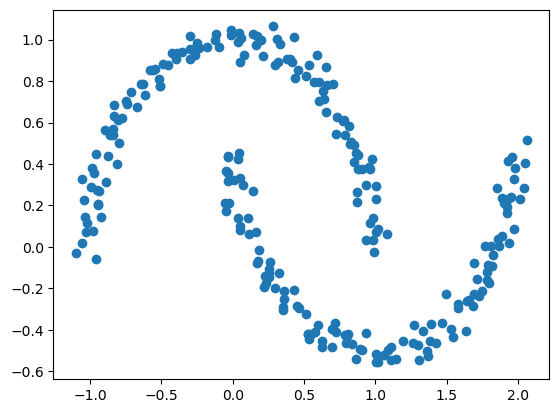

In [63]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [64]:
## feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
X_scaled=scaler.fit_transform(X)

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
dbscan=DBSCAN(eps=0.5)

In [68]:
dbscan.fit(X_scaled)

DBSCAN()

In [69]:
dbscan.labels_

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

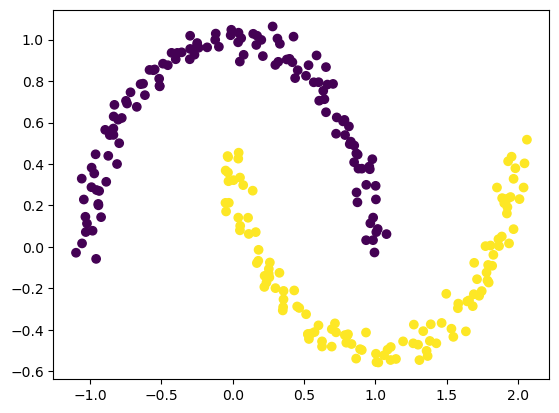

In [71]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)
plt.show()

## Look the data has been clustered into 2 groups even though the data was NON LINEAR .This shows how well can dbscan handle nonlinear data and outliers if any!!